## Question 1

Couldn't solve this question.

## Question 2

### a)

The posterior distribution on the given priors can be defined as : $\\$
$\hspace{5cm}  \mathbb{\pi((\mu,v)/Y)} \propto \mathbb{\pi((Y/(\mu,v)))} \mathbb{\pi(\mu/v)} \mathbb{\pi(v)} \\$

From the information given in the question : $\\$

$\hspace{4cm} \Rightarrow \mathbb{\pi((Y/(\mu,v)))} \propto \prod_{i=1}^{n} exp\left(\frac{-(x-\mu)^2}{2\sigma^2} \right) \\$
$\hspace{4cm} \Rightarrow \mathbb{\pi(\mu/v)} \propto  \left( 1 + \frac{\mu^2}{v}\right)^{(-\frac{v+1}{2})} \\$
$\hspace{4cm} \Rightarrow \mathbb{\pi(v)} \propto (b_0v)^{a_0-1}e^{-b_0v} \\  $
Here since we have a trunctated gamma distribution $\mathbb{\pi((\mu,v)/Y)} = 0$ for $v\in(-\infty,2)\\$
$\hspace{4cm} \Rightarrow \mathbb{\pi((\mu,v)/Y)} \propto  (b_0v)^{a_0-1} e^{-b_0v} \left(1 + \frac{\mu^2}{v}\right)^{\frac{-(v+1)}{2}}\prod_{i=1}^{n} exp\left(\frac{-(y-\mu)^2}{2} \right)$ for v $\in(2,\infty)\\  $



### b)

To sample from this posterior distribution we use the below given MH algorithm :

1. Choose a starting point $x_1$ that is defined as : $x_1 = \frac{\sum_{i=1}^{100} y_i}{100}\\$
2. Draw a proposal value x^* from our proposal distribution that is $\mathbb{N(\mu,h)}\\$
3. Calculate : $ \alpha(x_t,x^*) = min\left(1,\frac{\pi(x^*)q(x_t|x^*)}{\pi(x_t)q(x^*|x_t)}\right) \\$ Here $q(x_t|x^*) = q(x^*|x_t)$ as q is defined on the normal distribution for which q(y|x) = q(x|y)
4. Draw $\mathbb{U} \sim \mathbb{U[0,1]}$. If $\mathbb{U} < \alpha(x_t,x^*)$ . Set $\mathbb{x_{t+1} = y^*} \\$
5. Else, set $\mathbb{x_{t+1} = x_t}$

In [68]:
using Printf
using Statistics
using Random
using Pkg
using Distributions
using Plots
using SpecialFunctions
using StatsPlots
using StatsBase
using PlotlyJS
using CSV
using DataFrames

In [69]:
function posterior(b0,a0,mu,v,y)
    len = size(y)[1]
    if(v<2)
        return 0
    end
    val = ((b0*v)^(a0-1))*exp(-b0*v)*(1 + (mu^2)/v)^(-(v+1)/2)
    for i in 1:len
        val = val*exp(-((y[i]-mu)^2)/2)
    end
    return val
end


posterior (generic function with 1 method)

In [70]:
samples=100000
a0 = 2
b0 = 0.1
mu = 5
v = 6
h = 0.5

0.5

In [71]:
dist = []
for i in 1:100
    val = rand(Normal(mu,1))
    push!(dist,val)
end
ans1 = zeros(samples,1)
ans1[1] = mean(dist)
accepted=0
for i in 2:samples
   prop = rand(Normal(mu,h))
   ratio = posterior(b0,a0,prop,v,dist)/posterior(b0,a0,ans1[i-1],v,dist)
   alpha = min(1,ratio)
   u = rand()
    if(u<alpha)
         ans1[i] = prop
         accepted=accepted+1
    else
         ans1[i] = ans1[i-1]
    end 
end


In [72]:
print("Mean of samples with MCMC = ",mean(ans1))
print("\nMean of actual data = ",mean(dist))

Mean of samples with MCMC = 5.048192086818395
Mean of actual data = 5.06057964404404

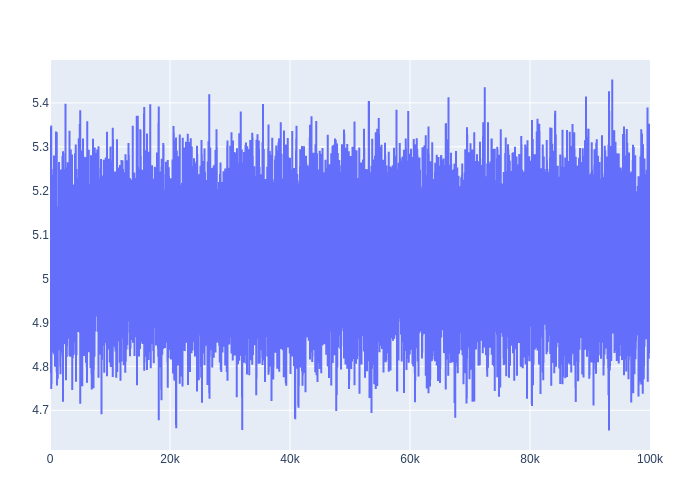

In [78]:
p1 = Plot(scatter(;y=ans1[:],xlabel="Samples",ylabel="Value",title="MCMC Samples"))

In [44]:
print("acceptance_rate = ",accepted/samples)

acceptance_rate = 0.24739

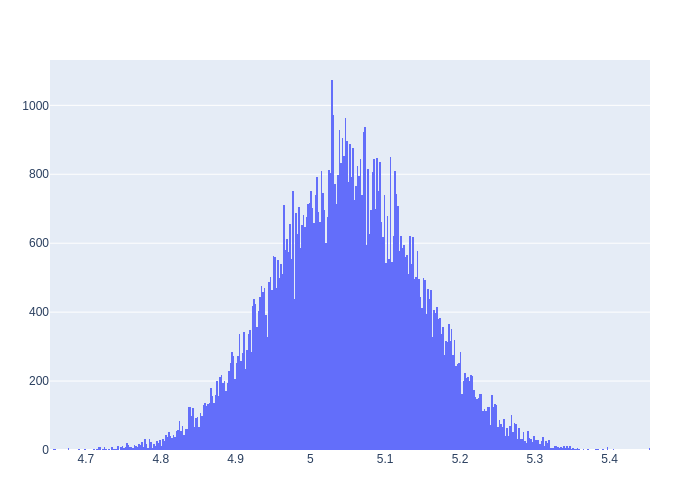

In [81]:
p2 = Plot(histogram(;x=ans1[:],color=6,label="",lw=3))

## Question 3

### a)

The posterior distribution can be defined as :$\\$
$\hspace{5cm} \mathbb{\pi(\beta,\sigma^2/y,X)} \propto \mathbb{\pi(y/X,\beta,\sigma^2)\pi(\beta/\sigma^2)\pi(\sigma^2)}\\ $

Using the priors and likelihood given in the question  : $\\$
$\hspace{4cm} \Rightarrow \mathbb{\pi(\beta,\sigma^2/y,X)} \propto (\sigma^2)^{-n/2} exp\left(\frac{-1}{2\sigma^2}(y - X\beta)^T(y - X\beta)\right)(\sigma^2)^{-k/2} exp\left(\frac{-1}{2\sigma^2}(\beta - \mu_0)^T(\beta - \mu_0) \right)(\sigma^2)^{-(a_0+1)} exp\left(-\frac{b_0}{\sigma^2}\right)$

Wasn't able to understand how to implement the second part.
